In [ ]:
import numpy as np
from numpy import ones
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from numpy import genfromtxt
from numpy import mean
from numpy.random import randn
from scipy.integrate import quad
import scipy.stats as stats
from scipy.stats import expon
from scipy.stats import norm
import pandas as pd
import sys
np.set_printoptions(precision=4)
np.set_printoptions(threshold=30)
np.set_printoptions(linewidth=300)
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
X = pd.read_csv('lunch_wait_time.csv', header = None)
X = LabelEncoder().fit_transform(X[0])
print (X)


[ 19  26  55 106  50  35  45  77  12  55  53  74   4 124  29  48   1  38  97  42  37  79  76 115  41  22 121  52  62  16  77  22  90 110  18   0 101  71  13  94  29  85  19  40 100  91   3  27  69  42  28   8 120  32 109 105  50  80 111  36  15  89  78  14 114  30  58 113  21  21 123  60  28  70
  94  79   9 103  17  17  81  90   7   1  52  17  67  28  31   3  45  15 108  79  12  54   9  28  20  27  95  56  25  83   2  50  88   2  76 114  93  61  37  46 119  33  82  68  37   6 118   4  12  74  59  29  14  73   5  65 104  49  63  98   2  95  87  64  47  34 102  49  51  26  29 122  24   6
  72  86  23  99  32  92  10  43  84 103  22  68 116 115  34  18  34  51  44 108  46  40  97  48  99  38  58  96  19  28  84  39  75  66  15  14  16  34  57  13  63   8  12  71  58 107 117 112  11  37  62 113]


In [ ]:
avg = np.mean(X)
theta = 1/avg
def p(x):
	return theta*np.exp(-theta*x)
def f(x):
  return x*p(x)


In [ ]:
#2 finding E[x] using integral
expectation,  err = quad(f, 0, np.inf)

print('Integration Vs Avg: %.3f, %.3f'%(avg,expectation))

Integration Vs Avg: 55.015, 55.015


In [ ]:
#Part 2
def f(x):
  return (2 * x + 1)*p(x)
avg = np.mean(2*X+1)

expectation, err = quad(f, 0, np.inf)
print('Integration Vs Avg: %.3f, %.3f'%(avg,expectation))

Integration Vs Avg: 111.030, 111.030


In [ ]:
#sampling
mean = 3
n = 50000
samples = np.random.exponential(mean,n)

In [ ]:
np.mean(samples)

3.002266202300974

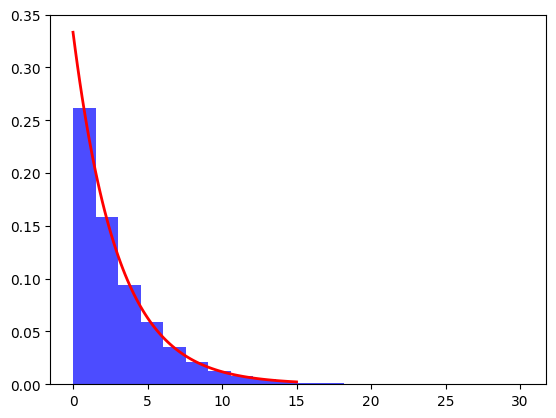

In [ ]:
n, bins, patches = plt.hist(samples, 20, facecolor = 'blue', alpha= 0.7, density= True)
#plot p(x) for exponential function with mean 3 over it
x = np.linspace(0, 15, 100)
y = stats.expon.pdf(x, scale = 3)
plt.plot(x,y, linewidth=2, color='r')
plt.show()
n = 50000

In [ ]:
X = np.random.rand(n)
print('P(x < 0.3) = %.3f'% (len(X[X<0.3])/n))
print('P(x < 0.6) = %.3f'% (len(X[X<0.6])/n))

P(x < 0.3) = 0.296
P(x < 0.6) = 0.597


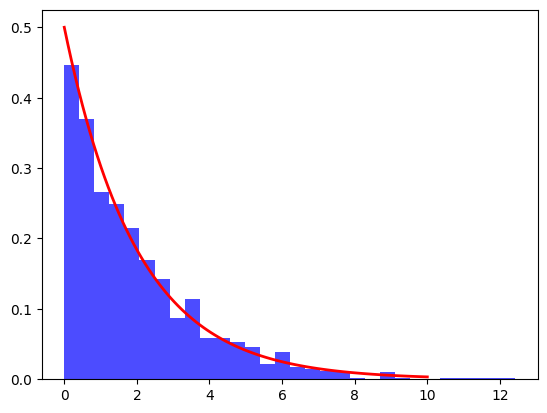

In [ ]:
#Inversion Sampling
def p(x):
  return stats.expon.pdf(x, scale = 2)
def F(x):
  return 1 - np.exp(-2*x)

def exponential_sampling(theta, n):
  v = np.random.uniform(0,1, n)
  samples = (np.log(1-v))/(-theta)
  return samples

theta = 0.5
num_samples = 1000

samples = exponential_sampling(theta, num_samples)

plt.hist(samples, 30, facecolor = 'blue', alpha= 0.7, density= True)
x = np.linspace(0, 10, 100)
y = stats.expon.pdf(x, scale = 2)
plt.plot(x,y, linewidth=2, color = 'r')
plt.show()

In [ ]:
#automatic integration
def f(x):
  return (x + 1)

ans, err = quad(f, 2, 3)
print('Integration Vs Avg: %.3f'%(ans))

#uniform distribution

def sampling(n):
  v = np.random.uniform(2,3, n)
  answer = np.mean(v + 1)
  return answer
sampling(2000)

Integration Vs Avg: 3.500


3.5001423684905477

In [ ]:
#P(x)
#2xe^-2x
#automatic integration
def f(x):
  return (2 * x * np.exp(-2*x))

ans, err = quad(f, 0, 1)
print('Integration Vs Avg: %.3f'%(ans))

def sampling(n):
  v = np.random.uniform(0,1, n)
  answer = np.mean(f(v))
  return answer
sampling(2000)

Integration Vs Avg: 0.297


0.2975604566939307

In [ ]:
#Inversion sampling
def p(x):
  if x <= 1.442 and x>= 0:
    return x**2
  else:
    return 0
def F(x):
  return 1/3*x**3
def inverse(x):
  return (3*x)**1/3


n = 20000
X = np.random.uniform(0,1,20000)
X2 = np.power(3*X, 1/3)
ρ = sum(X2 < 1)/len(X)
X2 = X2[X2 < 1]
print('Integral using Inversion Sampling : %.3f'% (np.mean(X2 + 1)*ρ))


#Rejection sampling
def p(x):
  if x <= 1.442 and x>= 0:
    return x**2
  else:
    return 0

X = []
k = 10
while len(X) < n:
  u = stats.expon.rvs().item()
  kq = k*np.exp(-u)
  pu = p(u)
  v = kq*np.random.rand()
  if v < pu: X.append(u)

Integral using Inversion Sampling : 0.588


In [1]:
X = np.array(X)
plt.hist(X2,bins = 40, alpha=0.7,color='blue',density=True)
plt.title('Histogram of $x^2$ distribution')
plt.show()

NameError: name 'np' is not defined

In [ ]:
ρ = sum(X < 1)/len(X)	# same logic applies here for ρ
X = X[X < 1]
print('Integral using Rejection Sampling : %.3f'% (np.mean(X + 1)*ρ))

Integral using Rejection Sampling : 0.588
